# The Sparks Foundation
GRIP:March 2022

# Name: Sachin chauhan
Data Science and Business Analytics Intern

# Task 1: Prediction using Supervised Machine Learning.

In [8]:
# importing all the required libraries.
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [9]:
# Reading data from link.

url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


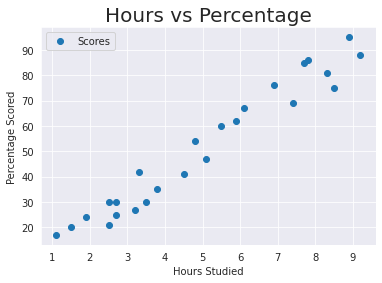

In [10]:
# Plotting the distribution of scores.
sns.set_style('darkgrid')
s_data.plot('Hours','Scores', style='o')  
plt.title('Hours vs Percentage', size=20)  
plt.xlabel('Hours Studied',size=10)  
plt.ylabel('Percentage Scored', size=10)  
plt.show()

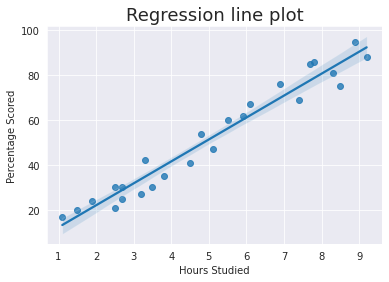

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [4]:
sns.regplot(x=s_data['Hours'], y=s_data['Scores'])  
plt.title('Regression line plot', size=18)
plt.xlabel('Hours Studied', size=10)
plt.ylabel('Percentage Scored', size=10)
plt.show()
print(s_data.corr())

# Training

In [11]:
#Defining x and y from the data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [12]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("---Training complete---")

---Training complete---


# Predicting

In [14]:
#print(X_test)       # Testing data - In Hours
y_pred = regressor.predict(X_test)  # Predicting the scores

prediction= pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Percentage': [k for k in y_pred]})
prediction

,Hours,Predicted Percentage
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [15]:
# Comparing Actual vs Predicted values
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


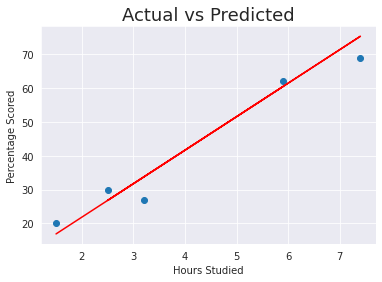

In [16]:
#Plotting the above comparison.

plt.scatter(x=X_test, y = y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Actual vs Predicted', size= 18)
plt.xlabel('Hours Studied', size=10)
plt.ylabel('Percentage Scored', size=10)
plt.show()

# Evaluating the model

In [17]:
from sklearn import metrics
print('Mean Absolute Error:' ,metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


# What will be the predicted score if a student studies for 9.25 hrs/day?

In [18]:
#Testing with our own data

hours= [9.25]
own_pred= regressor.predict([hours])
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0],6)))

No. of hours = [9.25]
Predicted Score = 93.691732


According to the simple linear regression model if a student studies for 9.25 hrs/day, is likely to score
# 93.691732 marks.